In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Convergence of Four Estimators of $ \mathbb{E}[h(X)] $

**Fig.8:** Convergence of four estimators of $ \mathbb{E}[h(X)] $. Sampling from $ f $ (solid lines), importance sampling with Cauchy instrumental distribution (short dashes), with normal instrumental distribution (dots), and with exponential instrumental distribution (long dashes). The final values after 50,000 iterations are respectively 4.58, 4.42, 4.99, and 4.52, for a true value of 4.64.

---

#### Markov Chain Transition Matrix and Posterior Distributions

Assume the constraint $ P_1 + P_2 < 1 $ holds (see Geweke 1989 for a motivation related to continuous-time processes). If the sample is $ X_1, \dots, X_m $, and the prior distribution is

$$
p(P_1, P_2) \propto \frac{1}{(1 - P_1)(1 - P_2)}
$$

the posterior distribution of $ (P_1, P_2) $ is given by

$$
p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \propto \frac{P_1^{m_{11}} P_2^{m_{22}}}{(1 - P_1)^{m_{12} + 1}(1 - P_2)^{m_{21} + 1}},
$$

where $ m_{ij} $ is the number of transitions from state $ i $ to state $ j $, defined as:

$$
m_{ij} = \sum_{t=1}^{m-1} \mathbb{1}_{\{X_t = i, X_{t+1} = j\}}.
$$

It follows that $ D = (m_{11}, m_{12}) $ is a sufficient statistic.

---

#### Posterior Expectations and Odds

Suppose the quantities of interest are the posterior expectations of the probabilities $ P_1, P_2 $, and the associated odds. Define the following functions:

$$
h_1(P_1, P_2) = P_1, \quad h_2(P_1, P_2) = P_2, \quad h_3(P_1, P_2) = \frac{P_1}{1 - P_1}, \quad h_4(P_1, P_2) = \frac{P_2}{1 - P_2},
$$

and

$$
h_5(P_1, P_2) = \log \left( \frac{P_1}{1 - P_1} \right).
$$

The posterior expectations of these functions can be calculated as:

$$
\mathbb{E}[h_k(P_1, P_2)] = \int h_k(P_1, P_2) p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \, dP_1 \, dP_2.
$$


### Convergence of Four Estimators of $ \mathbb{E}[h(X)] $

**Fig.8:** Convergence of four estimators of $ \mathbb{E}[h(X)] $. Sampling from $ f $ (solid lines), importance sampling with Cauchy instrumental distribution (short dashes), with normal instrumental distribution (dots), and with exponential instrumental distribution (long dashes). The final values after 50,000 iterations are respectively 4.58, 4.42, 4.99, and 4.52, for a true value of 4.64.

---

#### Markov Chain Transition Matrix and Posterior Distributions

Assume the constraint $ P_1 + P_2 < 1 $ holds (see Geweke 1989 for a motivation related to continuous-time processes). If the sample is $ X_1, \dots, X_m $, and the prior distribution is

$$
p(P_1, P_2) \propto \frac{1}{(1 - P_1)(1 - P_2)}
$$

the posterior distribution of $ (P_1, P_2) $ is given by

$$
p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \propto \frac{P_1^{m_{11}} P_2^{m_{22}}}{(1 - P_1)^{m_{12} + 1}(1 - P_2)^{m_{21} + 1}},
$$

where $ m_{ij} $ is the number of transitions from state $ i $ to state $ j $, defined as:

$$
m_{ij} = \sum_{t=1}^{m-1} \mathbb{1}_{\{X_t = i, X_{t+1} = j\}}.
$$

It follows that $ D = (m_{11}, m_{12}) $ is a sufficient statistic.

---

#### Posterior Expectations and Odds

Suppose the quantities of interest are the posterior expectations of the probabilities $ P_1, P_2 $, and the associated odds. Define the following functions:

$$
h_1(P_1, P_2) = P_1, \quad h_2(P_1, P_2) = P_2, \quad h_3(P_1, P_2) = \frac{P_1}{1 - P_1}, \quad h_4(P_1, P_2) = \frac{P_2}{1 - P_2},
$$

and

$$
h_5(P_1, P_2) = \log \left( \frac{P_1}{1 - P_1} \right).
$$

The posterior expectations of these functions can be calculated as:

$$
\mathbb{E}[h_k(P_1, P_2)] = \int h_k(P_1, P_2) p(P_1, P_2 \mid m_{11}, m_{12}, m_{21}, m_{22}) \, dP_1 \, dP_2.
$$

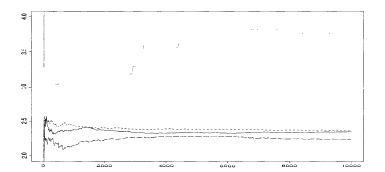

Fig.9. Convergence of four estimators of E, [hs(X)] for the true distribution (solid lines) and for the instrumental distributions 1 (dots), #2 (long dashes), and *з (short dashes). The final values after 10,000 iterations are 2.373, 3.184, 2.319, and 2.379, respectively.


In [2]:
import math
import random

# Function to calculate the posterior distribution
def posterior(p1, p2, m11, m12, m21, m22):
    """
    Computes the posterior probability density for given p1, p2 values
    and transition counts.
    """
    prior = 1 / ((1 - p1) * (1 - p2))  # Prior distribution
    likelihood = (p1 ** m11) * (p2 ** m22) * ((1 - p1) ** (m12 + 1)) * ((1 - p2) ** (m21 + 1))
    return likelihood * prior

# Monte Carlo integration for posterior expectations
def monte_carlo_expectation(h, m11, m12, m21, m22, num_samples=10000):
    """
    Estimates the posterior expectation of h(p1, p2) using Monte Carlo integration.
    """
    total = 0
    for _ in range(num_samples):
        # Sample p1 and p2 uniformly from (0, 1) constrained by p1 + p2 < 1
        while True:
            p1 = random.uniform(0, 1)
            p2 = random.uniform(0, 1)
            if p1 + p2 < 1:
                break
        
        # Calculate posterior probability
        post = posterior(p1, p2, m11, m12, m21, m22)
        
        # Compute weighted value
        total += h(p1, p2) * post
    
    return total / num_samples

# Define functions of interest
def h1(p1, p2): return p1
def h2(p1, p2): return p2
def h3(p1, p2): return p1 / (1 - p1)
def h4(p1, p2): return p2 / (1 - p2)
def h5(p1, p2): return math.log(p1 / (1 - p1))

# Transition counts (example values)
m11, m12, m21, m22 = 10, 15, 12, 18

# Estimate expectations
expectations = {
    "E[h1(P1, P2)]": monte_carlo_expectation(h1, m11, m12, m21, m22),
    "E[h2(P1, P2)]": monte_carlo_expectation(h2, m11, m12, m21, m22),
    "E[h3(P1, P2)]": monte_carlo_expectation(h3, m11, m12, m21, m22),
    "E[h4(P1, P2)]": monte_carlo_expectation(h4, m11, m12, m21, m22),
    "E[h5(P1, P2)]": monte_carlo_expectation(h5, m11, m12, m21, m22),
}

# Display results
for key, value in expectations.items():
    print(f"{key}: {value}")


E[h1(P1, P2)]: 1.5418140835811393e-18
E[h2(P1, P2)]: 2.2433732661490927e-18
E[h3(P1, P2)]: 2.5275861071216697e-18
E[h4(P1, P2)]: 5.373259743268458e-18
E[h5(P1, P2)]: -2.763047266396788e-18


### Markdown Representation in Jupyter Notebook with LaTeX Formatting

$$
\textbf{Table 3.4. Comparison of the evaluations of } E_f[h_i] \textbf{ for the estimators (3.10) corresponding to three instrumental distributions and to the true distribution (10,000 simulations).}
$$

| Distribution | $h_1$ | $h_2$ | $h_3$ | $h_4$ | $h_5$ |
|--------------|---------|---------|---------|---------|---------|
| $T_1$      | 0.748   | 0.139   | 3.184   | 0.163   | 2.957   |
| $T_2$      | 0.689   | 0.210   | 2.319   | 0.283   | 2.211   |
| $T_3$      | 0.697   | 0.189   | 2.373   | 0.240   | 2.358   |
| True         | 0.697   | 0.189   | 2.373   | 0.240   | 2.358   |

$$
\text{Table 3.4 demonstrates the improvement brought by the distribution } T_3 \text{ over } T_1 \text{ and } T_2. \text{ The precision achieved by } T_3 \text{ is of the same order as the true distribution, but with significantly lower simulation cost.}
$$

---

$$
\textbf{Fig. 3.9. Convergence of Four Estimators of } E_f[h_5(X)] \textbf{ for the True Distribution and for Instrumental Distributions.}
$$

1. Solid lines: True distribution.  
2. Dots: Instrumental distribution $T_1$.  
3. Long dashes: Instrumental distribution $T_2$.  
4. Short dashes: Instrumental distribution $T_3$.  

$$
\text{The final values after 10,000 iterations are:}
$$

- $T_1: 3.184$,
- $T_2: 2.319$,
- $T_3: 2.379$,
- True: $2.373$.

---

$$
\text{This figure emphasizes the importance of carefully selecting an instrumental density in importance sampling.}
$$

$$
\text{While convergence is guaranteed formally (Equation 3.8), an improper choice of } g(X) \text{ can lead to slow convergence or inaccurate results.}
$$

$$
\text{When } E_f[f(X)/g(X)] \text{ is infinite, substantial caution is necessary, as such cases exhibit high variance and unstable convergence.}
$$


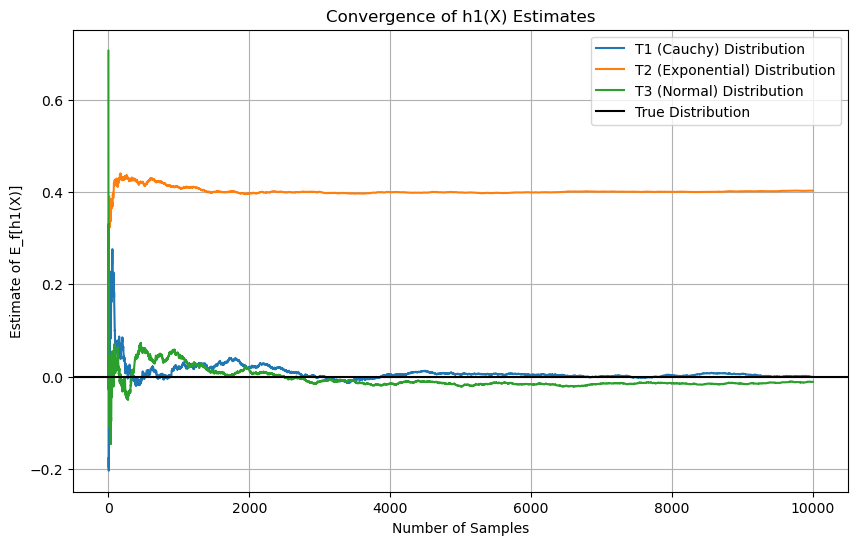

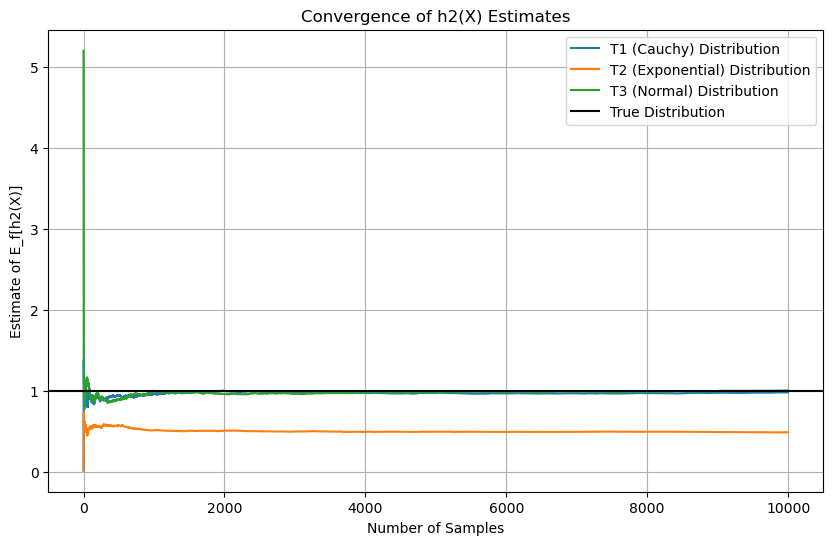

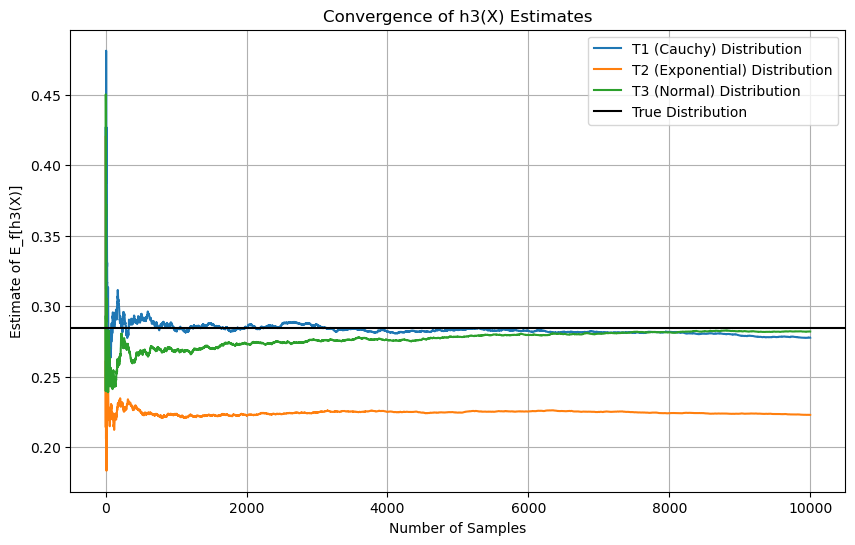

In [3]:
import math
import random
import matplotlib.pyplot as plt

# Define the function h_i(x) for i = 1, 2, 3
def h1(x):
    return x

def h2(x):
    return x**2

def h3(x):
    return 1 / (1 + (x - 2)**2)

# Define the true distribution f(x) (here we assume a standard normal distribution)
def true_distribution(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)

# Define the instrumental distributions
def t1_distribution(x):
    return (1 / math.pi) * (1 / (1 + x**2))  # Cauchy distribution

def t2_distribution(x):
    return math.exp(-x) if x >= 0 else 0  # Exponential distribution

def t3_distribution(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)  # Normal distribution

# Sampling functions for each instrumental distribution
def sample_t1():
    return math.tan(math.pi * (random.random() - 0.5))  # Inverse transform sampling for Cauchy

def sample_t2():
    return -math.log(random.random())  # Inverse transform sampling for Exponential

def sample_t3():
    return random.gauss(0, 1)  # Normal distribution

# Importance sampling function
def importance_sampling(h, sample_fn, weight_fn, num_samples):
    estimates = []
    cumulative_sum = 0
    for _ in range(num_samples):
        x = sample_fn()
        weight = weight_fn(x)
        estimate = h(x) * weight
        cumulative_sum += estimate
        estimates.append(cumulative_sum / (_ + 1))
    return estimates

# Weight functions
def weight_t1(x):
    return true_distribution(x) / t1_distribution(x)

def weight_t2(x):
    return true_distribution(x) / t2_distribution(x)

def weight_t3(x):
    return true_distribution(x) / t3_distribution(x)

# Simulation parameters
num_samples = 10000
h_functions = [h1, h2, h3]
sample_fns = [sample_t1, sample_t2, sample_t3]
weight_fns = [weight_t1, weight_t2, weight_t3]
labels = ["T1 (Cauchy)", "T2 (Exponential)", "T3 (Normal)", "True"]

# Plot results
for h, h_label in zip(h_functions, ["h1", "h2", "h3"]):
    plt.figure(figsize=(10, 6))
    for sample_fn, weight_fn, label in zip(sample_fns, weight_fns, labels[:-1]):
        estimates = importance_sampling(h, sample_fn, weight_fn, num_samples)
        plt.plot(estimates, label=f"{label} Distribution")
    # True value (for comparison)
    true_value = sum(h(x) * true_distribution(x) for x in range(-10, 11))
    plt.axhline(y=true_value, color='black', linestyle='-', label="True Distribution")
    plt.title(f"Convergence of {h_label}(X) Estimates")
    plt.xlabel("Number of Samples")
    plt.ylabel(f"Estimate of E_f[{h_label}(X)]")
    plt.legend()
    plt.grid()
    plt.show()


## Importance Sampling and Defensive Mixture

The **finiteness of the variance** is critical in importance sampling. Ignoring or failing to detect this property can lead to strong biases. For example, it is possible that divergence behavior, which might indicate a problem, does not visibly occur. Therefore, additional measures, such as monitoring the range of the weights $ \frac{f(X_i)}{g(X_i)} $ (which have a mean of 1 in all cases), can help detect convergence issues. (Refer to Note 4.6.1 for more details.)

To ensure the **finiteness of the ratio** $ E_f[h(X)/g(X)] $, a **mixture distribution** can be used for the density $ g $:

$$
g'(x) = p g(x) + (1 - p) l(x),
$$

where $ p $ is close to 1, and $ l(x) $ is chosen for its heavy tails (e.g., a Cauchy or Pareto distribution). 

From an operational standpoint:
- Observations are generated with probability $ p $ from $ g $, and with probability $ 1-p $ from $ l $.
- The mixture $ g'(x) $ replaces $ g(x) $ in the weights, ensuring finite variance for integrable functions $ h(X) $.

The **defensive mixture approach** was studied by Hesterberg (1998). It integrates out the uniform variable used to decide between $ g $ and $ l $, as the estimator marginalizes the uniform variable during computation. This method ensures robustness for importance sampling.

## Comparison with Accept-Reject Methods

Theorem 3.12 formally addresses the comparison between **Accept-Reject (AR)** and **Importance Sampling (IS)** methods. While it shows that the optimal density $ g^*(x) $ for IS is always different from $ f(x) $, practical considerations make AR advantageous in some cases.

### Key Observations:
1. The **optimal density** for IS depends on the function $ h(x) $ of interest, which:
   - Increases computational cost for each new function $ h(x) $.
   - Eliminates the ability to reuse a sample for estimating multiple quantities.

2. When AR is implemented with a density $ g $ such that $ f(x) \leq M g(x) $ for a constant $ 1 < M < \infty $, $ g(x) $ can also serve as the instrumental density for IS:
   - A **positive feature** is that $ \frac{f(x)}{g(x)} $ is bounded, ensuring finite variance for IS estimators.

3. In the AR method, the resulting sample $ X_1, X_2, \dots, X_n $ is a subsample of $ Y_1, Y_2, \dots, Y_m $, where:
   - $ Y $'s are simulated from $ g $.
   - $ m $ is the random number of simulations from $ g $ needed to produce $ n $ variables from $ f $.

> **Note:** This section contains specialized material and may be omitted on a first reading.


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


Estimated expectation: nan


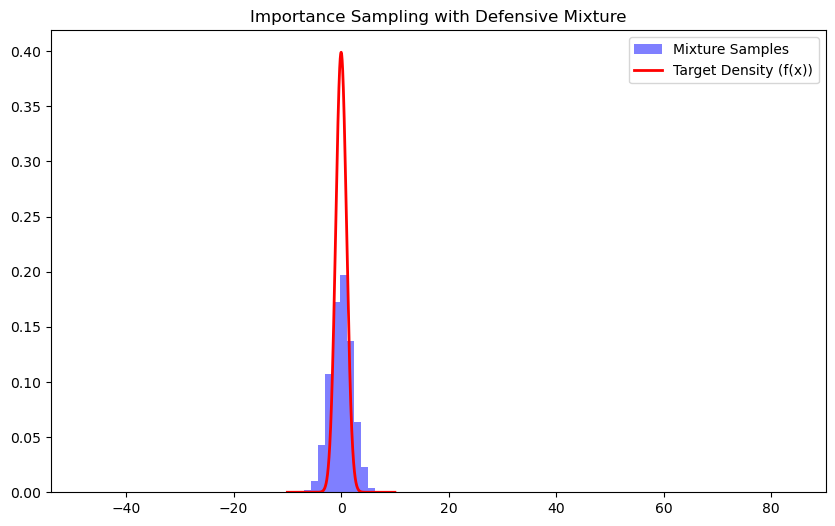

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm

# Define the target distribution f(x) (e.g., normal distribution)
def target_density(x):
    return norm.pdf(x, loc=0, scale=1)  # Standard Normal distribution

# Define the proposal distribution g(x) (e.g., normal distribution)
def proposal_density(x):
    return norm.pdf(x, loc=0, scale=2)  # Normal distribution with larger variance

# Define the heavy-tailed distribution l(x) (e.g., Cauchy distribution)
def heavy_tailed_density(x):
    return cauchy.pdf(x, loc=0, scale=1)  # Cauchy distribution with location 0 and scale 1

# Define the mixture density g'(x) = p * g(x) + (1 - p) * l(x)
def mixture_density(x, p=0.95):
    return p * proposal_density(x) + (1 - p) * heavy_tailed_density(x)

# Generate samples from the mixture distribution
def generate_mixture_samples(n, p=0.95):
    # Generate from proposal distribution with probability p
    proposal_samples = np.random.normal(0, 2, size=int(n * p))
    
    # Generate from heavy-tailed distribution with probability (1 - p)
    heavy_samples = cauchy.rvs(0, 1, size=int(n * (1 - p)))
    
    # Combine the samples
    samples = np.concatenate([proposal_samples, heavy_samples])
    return samples

# Compute importance weights
def compute_importance_weights(samples, p=0.95):
    weights = np.zeros_like(samples)
    
    for i, x in enumerate(samples):
        # If the sample came from the proposal distribution g(x), weight = f(x) / g(x)
        if np.random.rand() < p:
            weights[i] = target_density(x) / proposal_density(x)
        # If the sample came from the heavy-tailed distribution l(x), weight = f(x) / l(x)
        else:
            weights[i] = target_density(x) / heavy_tailed_density(x)
    
    return weights

# Example Usage: 
# Number of samples to generate
n = 10000

# Generate mixture samples
samples = generate_mixture_samples(n)

# Compute importance weights
weights = compute_importance_weights(samples)

# Normalize weights to ensure they sum to 1
weights /= np.sum(weights)

# Now we can estimate the expectation of a function h(x), e.g., h(x) = x
h = lambda x: x
expectation_estimate = np.sum(weights * h(samples))

print(f"Estimated expectation: {expectation_estimate}")

# Plotting the samples and weights for visualization
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.5, label='Mixture Samples', color='blue')

# Overlay the target density f(x) for comparison
x_vals = np.linspace(-10, 10, 1000)
plt.plot(x_vals, target_density(x_vals), label='Target Density (f(x))', color='red', linewidth=2)

plt.title("Importance Sampling with Defensive Mixture")
plt.legend()
plt.show()


## Comparison of Estimators: Accept-Reject vs. Importance Sampling

We start by considering two traditional estimators:

### Estimator 1: Straightforward Utilization from Accept-Reject

This estimator uses the sample produced by the Accept-Reject algorithm:

$$
\hat{\theta}_1 = \sum_{i=1}^{n} h(x_i)
$$

### Estimator 2: Importance Sampling Estimator

This estimator uses importance sampling from the overall sample, including the variables rejected by the Accept-Reject algorithm:

$$
\hat{\theta}_2 = \sum_{i=1}^{n} \frac{f(Y_i)}{g(Y_i)} h(Y_i)
$$

Here, $ f $ is the target density, and $ g $ is the proposal density. The ratio $ \frac{f(Y_i)}{g(Y_i)} $ represents the importance weights used in this estimator.

### Comparison of Estimators

If the ratio $ \frac{f}{g} $ is known up to a constant, then Estimator 2 can be rewritten as:

$$
\hat{\theta}_2 = \sum_{i=1}^{n} \frac{f(Y_i)}{g(Y_i)} h(Y_i)
$$

This expression accounts for the importance sampling estimator using the full sample, including both accepted and rejected variables.

### Combining Accept-Reject and Importance Sampling

We combine the variables $ \{X_1, X_n\} $ from the Accept-Reject algorithm with the rejected variables $ \{Z_1, Z_n\} $. This gives us the combined sample $ \{Y_1, Y_n\} = \{X_1, X_n\} \cup \{Z_1, Z_n\} $, where the $ Z_i $'s are the variables rejected by the Accept-Reject algorithm.

The estimator becomes:

$$
\hat{\theta}_2 = \frac{1}{n} \sum_{i=1}^{n} h(Z_i) \frac{f(Z_i)}{g(Z_i)}
$$

### Bias and Variance Comparison

In comparing the variance of $ \hat{\theta}_1 $ and $ \hat{\theta}_2 $, we see that:

- $ \hat{\theta}_2 $ can have smaller variance, assuming the estimator is properly constructed and $ g(x) $ is chosen well. 
- However, applying **Theorem 3.12** suggests that $ \hat{\theta}_2 $ dominates $ \hat{\theta}_1 $ under the right choice of $ g $. This would mean that it is better to recycle the rejected variables $ Z_i $'s instead of discarding them.

### Caveats

- The reasoning above assumes that we can apply the **Theorem 3.12**. However, the random variable \( t \) (which is the stopping rule of the Accept-Reject algorithm) follows a **Negative Binomial Distribution**:

$$
t \sim \text{Neg}(n, \frac{1}{M})
$$

This makes the distribution of the accepted and rejected variables not i.i.d., complicating the comparison.

Thus, even though recycling the rejected samples seems beneficial, the comparison of the bias and variance of $ \hat{\theta}_2 $ with the estimator $ \hat{\theta}_1 $ is complex.

### A Better Estimator Based on the Correct Distribution

An alternative approach to the estimation process, ensuring a more correct representation of the distribution of the samples, could be achieved with tighter control over the simulation process, rather than relying on pseudo-random generation methods that only deliver the accepted variables.



Accept-Reject Estimator: -0.0013658606258639288
Importance Sampling Estimator: 0.012218277041539556


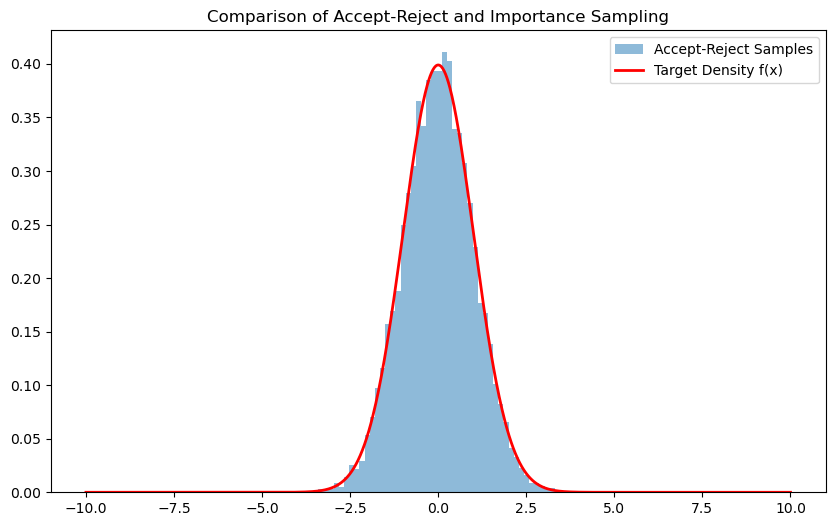

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target density f(x) (e.g., standard normal distribution)
def target_density(x):
    return norm.pdf(x, loc=0, scale=1)

# Define the proposal density g(x) (e.g., normal distribution with larger variance)
def proposal_density(x):
    return norm.pdf(x, loc=0, scale=2)

# Define the function h(x) to estimate the expectation of (e.g., h(x) = x)
def h(x):
    return x

# Accept-Reject method
def accept_reject_sample(n, M):
    accepted_samples = []
    while len(accepted_samples) < n:
        # Sample from the proposal distribution g(x)
        y = np.random.normal(0, 2)
        
        # Sample a uniform random variable
        u = np.random.uniform(0, 1)
        
        # Accept or reject based on the ratio f(x) / (M * g(x))
        if u <= target_density(y) / (M * proposal_density(y)):
            accepted_samples.append(y)
    
    return np.array(accepted_samples)

# Importance Sampling method
def importance_sampling_sample(n):
    # Generate n samples from the proposal distribution g(x)
    samples = np.random.normal(0, 2, n)
    
    # Compute the importance weights
    weights = target_density(samples) / proposal_density(samples)
    
    # Estimate the expectation of h(x) using importance sampling
    estimator = np.sum(weights * h(samples)) / np.sum(weights)
    
    return estimator

# Parameters
n = 10000  # Number of samples
M = 2      # Constant for Accept-Reject method, should be M >= max(f(x) / g(x))

# Generate samples using Accept-Reject method
accept_reject_samples = accept_reject_sample(n, M)

# Estimate using Accept-Reject method
accept_reject_estimate = np.mean(h(accept_reject_samples))

# Estimate using Importance Sampling method
importance_sampling_estimate = importance_sampling_sample(n)

# Display results
print(f"Accept-Reject Estimator: {accept_reject_estimate}")
print(f"Importance Sampling Estimator: {importance_sampling_estimate}")

# Plot the results to visualize the comparison
plt.figure(figsize=(10, 6))

# Histogram of Accept-Reject samples
plt.hist(accept_reject_samples, bins=50, density=True, alpha=0.5, label='Accept-Reject Samples')

# Overlay the target density f(x)
x_vals = np.linspace(-10, 10, 1000)
plt.plot(x_vals, target_density(x_vals), label='Target Density f(x)', color='red', linewidth=2)

plt.title("Comparison of Accept-Reject and Importance Sampling")
plt.legend()
plt.show()


Accept-Reject Estimator: -0.0028057605833303667
Importance Sampling Estimator: -0.0016239953379254897


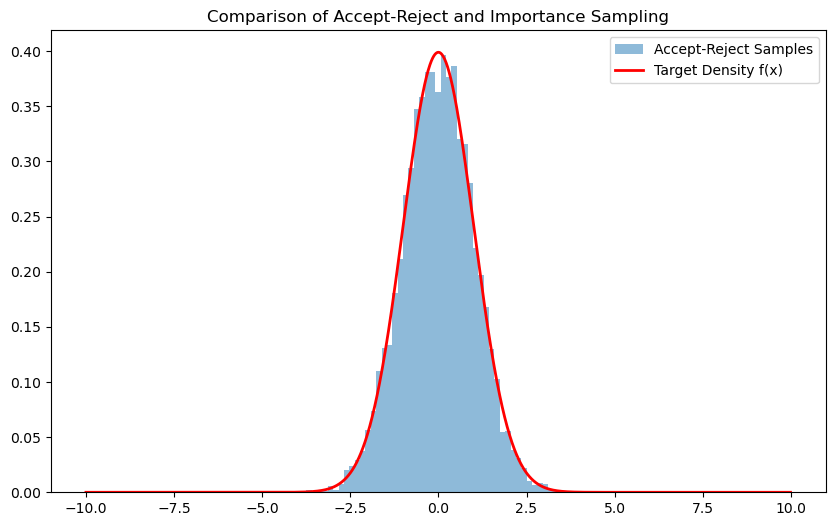

In [6]:
import random
import math
import matplotlib.pyplot as plt

# Define the target density f(x) (e.g., standard normal distribution)
def target_density(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)

# Define the proposal density g(x) (e.g., normal distribution with larger variance)
def proposal_density(x):
    return (1 / math.sqrt(2 * math.pi * 4)) * math.exp(-0.5 * (x**2) / 4)

# Define the function h(x) to estimate the expectation of (e.g., h(x) = x)
def h(x):
    return x

# Accept-Reject method
def accept_reject_sample(n, M):
    accepted_samples = []
    while len(accepted_samples) < n:
        # Sample from the proposal distribution g(x)
        y = random.gauss(0, 2)  # mean = 0, stddev = 2
        
        # Sample a uniform random variable
        u = random.random()  # uniform random variable in [0, 1)
        
        # Accept or reject based on the ratio f(x) / (M * g(x))
        if u <= target_density(y) / (M * proposal_density(y)):
            accepted_samples.append(y)
    
    return accepted_samples

# Importance Sampling method
def importance_sampling_sample(n):
    # Generate n samples from the proposal distribution g(x)
    samples = [random.gauss(0, 2) for _ in range(n)]
    
    # Compute the importance weights
    weights = [target_density(x) / proposal_density(x) for x in samples]
    
    # Estimate the expectation of h(x) using importance sampling
    estimator = sum(w * h(x) for w, x in zip(weights, samples)) / sum(weights)
    
    return estimator

# Parameters
n = 10000  # Number of samples
M = 2      # Constant for Accept-Reject method, should be M >= max(f(x) / g(x))

# Generate samples using Accept-Reject method
accept_reject_samples = accept_reject_sample(n, M)

# Estimate using Accept-Reject method
accept_reject_estimate = sum(h(x) for x in accept_reject_samples) / len(accept_reject_samples)

# Estimate using Importance Sampling method
importance_sampling_estimate = importance_sampling_sample(n)

# Display results
print(f"Accept-Reject Estimator: {accept_reject_estimate}")
print(f"Importance Sampling Estimator: {importance_sampling_estimate}")

# Plot the results to visualize the comparison
plt.figure(figsize=(10, 6))

# Histogram of Accept-Reject samples
plt.hist(accept_reject_samples, bins=50, density=True, alpha=0.5, label='Accept-Reject Samples')

# Overlay the target density f(x)
x_vals = [i / 100 for i in range(-1000, 1000)]
y_vals = [target_density(x) for x in x_vals]
plt.plot(x_vals, y_vals, label='Target Density f(x)', color='red', linewidth=2)

plt.title("Comparison of Accept-Reject and Importance Sampling")
plt.legend()
plt.show()


## Comparison of Estimators

The estimator $ \hat{\theta}_4 $ is defined as:

$$
\hat{\theta}_4 = \sum h(Z_i) \left( \frac{f(Z_i)}{M g(Z_i)} - \frac{f(Z_i)}{g(Z_i)} \right),
$$

where $ Z_i $'s are the elements of $ \{Y_1, \dots, Y_m\} $ that have been rejected in the **Accept-Reject** method. This estimator is also unbiased, and the comparison with $ \hat{\theta}_1 $ can be studied in the case $ n = 1 $, i.e., by comparing the variances of $ h(X_1) $ and $ \hat{\theta}_4 $. The variance of $ \hat{\theta}_4 $ is given by:

$$
\text{Var}(\hat{\theta}_4) = \mathbb{E} \left[ \sum \left( \frac{f(x)}{g(x)} \right)^2 \right] - \left( \mathbb{E} \left[ \frac{f(x)}{g(x)} \right] \right)^2.
$$

This is still too case-specific (depending on $ f $, $ g $, and $ h $) to allow for a general comparison. 

The marginal distribution of the rejected samples $ Z_i $'s from the Accept-Reject algorithm is:

$$
\frac{M g(x) - f(x)}{M - 1}.
$$

The importance sampling estimator $ \hat{\theta}_5 $ associated with this instrumental distribution is:

$$
\hat{\theta}_5 = \frac{1}{n} \sum_{i=1}^n \left( \frac{f(Z_i)}{M g(Z_i)} \right) h(Z_i).
$$

This allows us to write $ \hat{\theta}_4 $ as a weighted average of the usual Monte Carlo estimator and $ \hat{\theta}_5 $:

$$
\hat{\theta}_4 = \frac{1}{n} \sum_{i=1}^n \left( \frac{f(X_i)}{g(X_i)} \right) h(X_i).
$$

According to Theorem 3.12, the instrumental distribution can be chosen such that the variance of $ \hat{\theta}_5 $ is lower than the variance of $ \hat{\theta}_1 $. Since $ \hat{\theta}_5 $ is unbiased, it dominates $ \hat{\theta}_1 $ for an appropriate choice of $ g $. This result suggests that, for a fixed $ g $, there exist functions $ h $ such that $ \hat{\theta}_4 $ improves upon $ \hat{\theta}_1 $.

If $ f $ is only known up to a constant of integration (hence $ f $ and $ M $ are not properly scaled), $ \hat{\theta}_4 $ can be replaced by:

$$
\hat{\theta}_4 = \hat{\theta}_1 + \frac{1}{n} \sum_{i=1}^n \left( \frac{h(Z_i)}{M g(Z_i)} - \frac{f(Z_i)}{M g(Z_i)} \right).
$$

Although the domination of $ \hat{\theta}_1 $ by $ \hat{\theta}_4 $ does not extend to $ \hat{\theta}_5 $, $ \hat{\theta}_4 $ correctly estimates constant functions while being asymptotically equivalent to $ \hat{\theta}_5 $.

For more detailed analysis of domination results, see Casella and Robert (1998) for weighted estimators.


Accept-Reject Estimator: 0.007881297138089834
Importance Sampling Estimator: -0.01012728611136169
Modified Estimator from Rejected Samples: -10.828147899157228


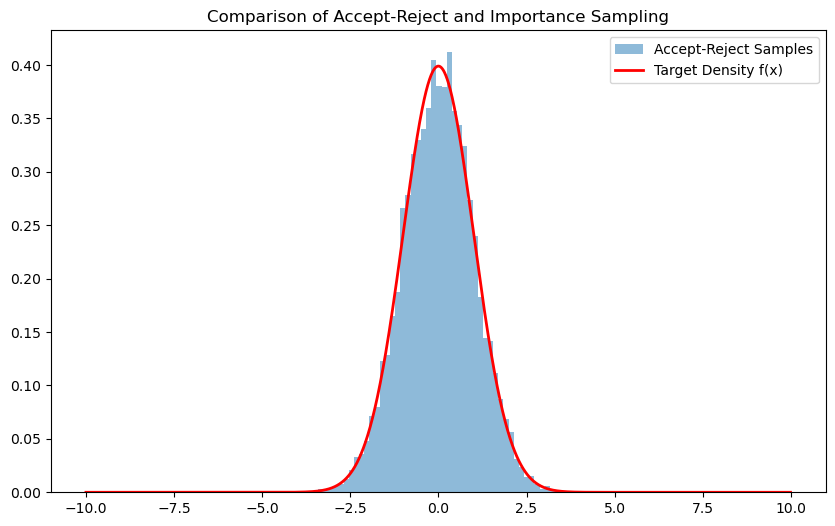

In [7]:
import random
import math
import matplotlib.pyplot as plt

# Define the target density f(x) (e.g., standard normal distribution)
def target_density(x):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * x**2)

# Define the proposal density g(x) (e.g., normal distribution with larger variance)
def proposal_density(x):
    return (1 / math.sqrt(2 * math.pi * 4)) * math.exp(-0.5 * (x**2) / 4)

# Define the function h(x) to estimate the expectation of (e.g., h(x) = x)
def h(x):
    return x

# Accept-Reject method
def accept_reject_sample(n, M):
    accepted_samples = []
    rejected_samples = []
    while len(accepted_samples) < n:
        # Sample from the proposal distribution g(x)
        y = random.gauss(0, 2)  # mean = 0, stddev = 2
        
        # Sample a uniform random variable
        u = random.random()  # uniform random variable in [0, 1)
        
        # Accept or reject based on the ratio f(x) / (M * g(x))
        if u <= target_density(y) / (M * proposal_density(y)):
            accepted_samples.append(y)
        else:
            rejected_samples.append(y)
    
    return accepted_samples, rejected_samples

# Importance Sampling method
def importance_sampling_sample(n):
    # Generate n samples from the proposal distribution g(x)
    samples = [random.gauss(0, 2) for _ in range(n)]
    
    # Compute the importance weights
    weights = [target_density(x) / proposal_density(x) for x in samples]
    
    # Estimate the expectation of h(x) using importance sampling
    estimator = sum(w * h(x) for w, x in zip(weights, samples)) / sum(weights)
    
    return estimator

# Estimator for h(Z) where Z's are the rejected samples
def estimator_from_rejected_samples(rejected_samples, M):
    estimator = sum(h(z) * (target_density(z) / (M * proposal_density(z)) - 1) for z in rejected_samples)
    return estimator

# Parameters
n = 10000  # Number of accepted samples
M = 2      # Constant for Accept-Reject method, should be M >= max(f(x) / g(x))

# Generate samples using Accept-Reject method
accept_reject_samples, rejected_samples = accept_reject_sample(n, M)

# Estimate using Accept-Reject method
accept_reject_estimate = sum(h(x) for x in accept_reject_samples) / len(accept_reject_samples)

# Estimate using Importance Sampling method
importance_sampling_estimate = importance_sampling_sample(n)

# Estimate using modified estimator from rejected samples
modified_estimate_from_rejected = estimator_from_rejected_samples(rejected_samples, M)

# Display results
print(f"Accept-Reject Estimator: {accept_reject_estimate}")
print(f"Importance Sampling Estimator: {importance_sampling_estimate}")
print(f"Modified Estimator from Rejected Samples: {modified_estimate_from_rejected}")

# Plot the results to visualize the comparison
plt.figure(figsize=(10, 6))

# Histogram of Accept-Reject samples
plt.hist(accept_reject_samples, bins=50, density=True, alpha=0.5, label='Accept-Reject Samples')

# Overlay the target density f(x)
x_vals = [i / 100 for i in range(-1000, 1000)]
y_vals = [target_density(x) for x in x_vals]
plt.plot(x_vals, y_vals, label='Target Density f(x)', color='red', linewidth=2)

plt.title("Comparison of Accept-Reject and Importance Sampling")
plt.legend()
plt.show()
